# **<font size=48>Linear Regression</font>**<br>




## Lab Enhancement Details
- Name : **Nuha Awadah binti Mohd Yusof** 
- Student ID: 1211303209



# Introduction and Background

## Definition & Working principle

Linear regression is a **supervised learining** algorithm used when target / dependent variable are **continuous** real number. It establishes relationship between dependent variable $y$ and one or more independent variable $x$ using best fit line. It works on the principle of ordinary least square $(OLS)$ and Mean square errror $(MSE)$. 

In statistics $(OLS)$ is method to estimated unknown parameter of linear regression function, it's goal is to minimize sum of square difference between observed dependent variable in the given data set and those predicted by linear regression fuction. 

When applying in Machine Learning, linear regression models are a good starting point for regression tasks.
Such models are popular because they can be fit quickly and are straightforward to interpret.
The simplest form of linear regression model (i.e., fitting a straight line to two-dimensional data), but such models can be extended to model more complicated data behavior.


# Importing Libraries

### Mount Google Drive

In [58]:
# This is needed if you need to read data from your Google Drive
import os

try:
    from google.colab import drive
    drive.mount('/content/drive')

    notebook_path = r"/content/drive/Shareddrives/Machine Learning/Submission/Lab enchancement/Dataset"
    os.chdir(notebook_path)
    !pwd
except ImportError:
    pass # do nothing

### Import Libraries

In [59]:
%matplotlib inline
# Import library
import pandas  as pd #Data manipulation
import numpy as np #Data manipulation
import matplotlib.pyplot as plt # Visualization
import seaborn as sns #Visualization

# Styling Choice
plt.style.use('seaborn-whitegrid')

C:\Users\Anis\AppData\Local\Temp\ipykernel_1532\3181886656.py:9: MatplotlibDeprecationWarning:

The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.



# Simple / Univariate Linear Regression

 $\mathbf{x_i}$ is used to denote the independent variable and $\mathbf{y_i}$ to denote dependent variable. A pair of $\mathbf{(x_i,y_i)}$ is called training example. The subscripe $\mathbf{i}$ in the notation is simply index into the training set. We have $\mathbf{m}$ training example then $\mathbf{i = 1,2,3,...m}$.

The goal of supervised learning is to learn a *hypothesis function $\mathbf{h}$*, for a given training set that can used to estimate $\mathbf{y}$ based on $\mathbf{x}$. So hypothesis fuction represented as 

$$\mathbf{ h_\theta(x_{i}) = \theta_0 + \theta_1x_i }$$   
$\mathbf{\theta_0,\theta_1}$ are parameter of hypothesis. 

To simplify, a straight-line fit is a model of the form:
$$
y = ax + b
$$
where $a$ is commonly known as the *slope*, and $b$ is commonly known as the *intercept*.

Consider the following data, which is scattered about a line with a slope of 2 and an intercept of –5 (see the following figure):

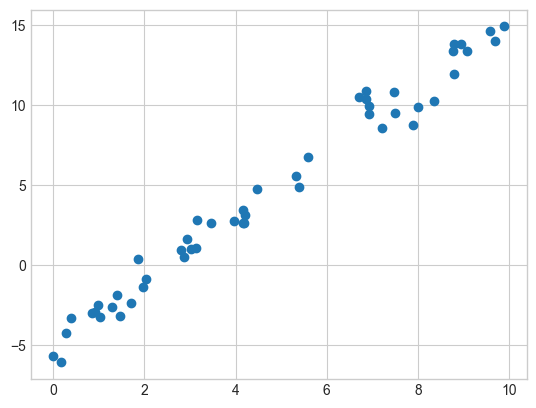

In [60]:
rng = np.random.RandomState(1)
x = 10 * rng.rand(50)
y = 2 * x - 5 + rng.randn(50)
plt.scatter(x, y)

When looking at the generated data, $\mathbf{x}$ and $\mathbf{y}$ has patterns where it would seemed that it goes in a straight line.

In [61]:
x

array([4.17022005e+00, 7.20324493e+00, 1.14374817e-03, 3.02332573e+00,
       1.46755891e+00, 9.23385948e-01, 1.86260211e+00, 3.45560727e+00,
       3.96767474e+00, 5.38816734e+00, 4.19194514e+00, 6.85219500e+00,
       2.04452250e+00, 8.78117436e+00, 2.73875932e-01, 6.70467510e+00,
       4.17304802e+00, 5.58689828e+00, 1.40386939e+00, 1.98101489e+00,
       8.00744569e+00, 9.68261576e+00, 3.13424178e+00, 6.92322616e+00,
       8.76389152e+00, 8.94606664e+00, 8.50442114e-01, 3.90547832e-01,
       1.69830420e+00, 8.78142503e+00, 9.83468338e-01, 4.21107625e+00,
       9.57889530e+00, 5.33165285e+00, 6.91877114e+00, 3.15515631e+00,
       6.86500928e+00, 8.34625672e+00, 1.82882773e-01, 7.50144315e+00,
       9.88861089e+00, 7.48165654e+00, 2.80443992e+00, 7.89279328e+00,
       1.03226007e+00, 4.47893526e+00, 9.08595503e+00, 2.93614148e+00,
       2.87775339e+00, 1.30028572e+00])

In [62]:
y

array([ 2.65326739,  8.56128423, -5.66895863,  1.03398685, -3.18219253,
       -2.91881241,  0.3850064 ,  2.6532587 ,  2.74351393,  4.88870572,
        2.63673199, 10.39684461, -0.86014725, 11.92535308, -4.26133265,
       10.50960534,  3.466255  ,  6.79099968, -1.89209091, -1.39022006,
        9.87237318, 14.01588879,  1.05958933,  9.4330755 , 13.36676646,
       13.82323535, -3.01352845, -3.33376317, -2.35778955, 13.81571822,
       -2.5201335 ,  3.12405966, 14.64630875,  5.58773399,  9.96917167,
        2.83012944, 10.91559396, 10.2960171 , -6.07834826,  9.49842044,
       14.93725885, 10.83948201,  0.92451479,  8.76338535, -3.24168388,
        4.78584517, 13.4020048 ,  1.63429415,  0.53317863, -2.60018663])

We can use Scikit-Learn's `LinearRegression` estimator to fit this data and construct the best-fit line which means line that would be the close to all of the points, as shown in the following figure:

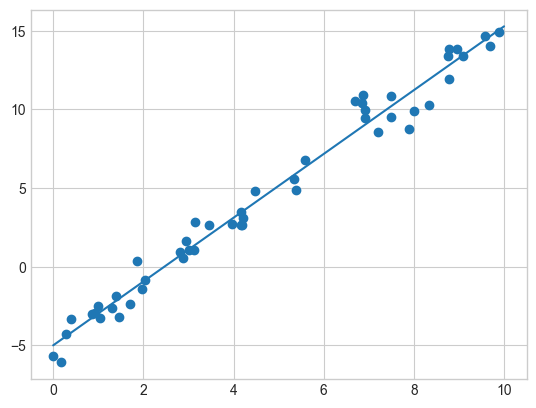

In [63]:
from sklearn.linear_model import LinearRegression
model = LinearRegression(fit_intercept=True)

model.fit(x[:, np.newaxis], y)

xfit = np.linspace(0, 10, 1000)
yfit = model.predict(xfit[:, np.newaxis])

plt.scatter(x, y)
plt.plot(xfit, yfit);

The slope and intercept of the data are contained in the model's fit parameters, which in [Scikit-Learn](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) are always marked by a trailing underscore.
Here the relevant parameters are `coef_` and `intercept_`:

In [64]:
print("Model slope:    ", model.coef_[0])
print("Model intercept:", model.intercept_)

Model slope:     2.0272088103606944
Model intercept: -4.9985770855532


We see that the results are very close to the values used to generate the data.

# Multidimensional Linear Models

The `LinearRegression` estimator is much more capable than this, however—in addition to simple straight-line fits, it can also handle multidimensional linear models of the form:
$$
y = a_0 + a_1 x_1 + a_2 x_2 + \cdots
$$
where there are multiple $x$ values.
Geometrically, this is akin to fitting a plane to points in three dimensions, or fitting a hyperplane to points in higher dimensions.

The multidimensional nature of such regressions makes them more difficult to visualize, but we can see one of these fits in action by building some example data, using NumPy's matrix multiplication operator:

In [65]:
rng = np.random.RandomState(1)
X = 10 * rng.rand(100, 3)
y = 0.5 + np.dot(X, [1.5, -2., 1.])

model.fit(X, y)
print(model.intercept_)
print(model.coef_)

0.5000000000000033
[ 1.5 -2.   1. ]


Here the $y$ data is constructed from a linear combination of three random $x$ values, and the linear regression recovers the coefficients used to construct the data.

In this way, we can use the single `LinearRegression` estimator to fit lines, planes, or hyperplanes to our data.
It still appears that this approach would be limited to strictly linear relationships between variables, but it turns out we can relax this as well.

In [66]:
X

array([[4.17022005e+00, 7.20324493e+00, 1.14374817e-03],
       [3.02332573e+00, 1.46755891e+00, 9.23385948e-01],
       [1.86260211e+00, 3.45560727e+00, 3.96767474e+00],
       [5.38816734e+00, 4.19194514e+00, 6.85219500e+00],
       [2.04452250e+00, 8.78117436e+00, 2.73875932e-01],
       [6.70467510e+00, 4.17304802e+00, 5.58689828e+00],
       [1.40386939e+00, 1.98101489e+00, 8.00744569e+00],
       [9.68261576e+00, 3.13424178e+00, 6.92322616e+00],
       [8.76389152e+00, 8.94606664e+00, 8.50442114e-01],
       [3.90547832e-01, 1.69830420e+00, 8.78142503e+00],
       [9.83468338e-01, 4.21107625e+00, 9.57889530e+00],
       [5.33165285e+00, 6.91877114e+00, 3.15515631e+00],
       [6.86500928e+00, 8.34625672e+00, 1.82882773e-01],
       [7.50144315e+00, 9.88861089e+00, 7.48165654e+00],
       [2.80443992e+00, 7.89279328e+00, 1.03226007e+00],
       [4.47893526e+00, 9.08595503e+00, 2.93614148e+00],
       [2.87775339e+00, 1.30028572e+00, 1.93669579e-01],
       [6.78835533e+00, 2.11628

In [67]:
y

array([ -7.65001605,   3.02325672,   0.35036337,   7.05055573,
       -13.72168905,   7.79781489,   6.65121998,  15.67866623,
        -3.39585387,   6.47063839,   3.13194531,  -2.18490669,
        -5.71211675,  -0.54340051, -10.04666662,  -8.01736569,
         2.40972822,   9.10543727,  12.54752254,  -2.08759851,
         0.69789825,  11.07258392,   9.605085  ,  -7.39496566,
        -9.5819122 , -12.09220005,   6.07528275,  -1.67478215,
        -9.08789409,   7.92072795, -12.26947425,   3.38337796,
         2.60580635,   8.49485669,  15.7290878 ,  18.82834922,
        -7.35959816,  -9.1266914 ,  -6.08049658,   1.35758248,
         0.55704715,  -7.61908232,  -6.80655502,   2.66852724,
        16.54883423,  -8.26888336,   4.0730973 ,   2.56190915,
         1.27548898,   0.12605487, -12.08490779,   5.94114217,
         1.50446356,  13.34317398,  -5.21236827,   4.24165127,
         1.39153728,   7.53574966,   0.5498636 ,   6.84793866,
        13.26983794,   4.33929089,  -4.14100029,   9.76

## Matrix Formulation

In general we can write above vector as $$ \mathbf{ x_{ij}} = \left( \begin{smallmatrix} \mathbf{x_{i1}} & \mathbf{x_{i2}} &.&.&.& \mathbf{x_{in}} \end{smallmatrix} \right)$$

Now we combine all aviable individual vector into single input matrix of size $(m,n)$ and denoted it by $\mathbf{X}$ input matrix, which consist of all training exaples,
$$\mathbf{X} = \left( \begin{smallmatrix} x_{11} & x_{12} &.&.&.&.& x_{1n}\\
                                x_{21} & x_{22} &.&.&.&.& x_{2n}\\
                                x_{31} & x_{32} &.&.&.&.& x_{3n}\\
                                .&.&.&. &.&.&.& \\
                                .&.&.&. &.&.&.& \\
                                x_{m1} & x_{m2} &.&.&.&.&. x_{mn}\\
                                \end{smallmatrix} \right)_{(m,n)}$$

We represent parameter of function and dependent variable in vactor form as  
$$\theta = \left (\begin{matrix} \theta_0 \\ \theta_1 \\ .\\.\\ \theta_j\\.\\.\\ \theta_n \end {matrix}\right)_{(n+1,1)} 
\mathbf{ y } = \left (\begin{matrix} y_1\\ y_2\\. \\. \\ y_i \\. \\. \\ y_m \end{matrix} \right)_{(m,1)}$$

So we represent hypothesis function in vectorize form $$\mathbf{ h_\theta{(x)} = X\theta}$$.



We can try and see it in a 3D figure.

In [68]:
import plotly.graph_objects as go

scatter_points = go.Scatter3d(
    x=X[:, 0],
    y=X[:, 1],
    z=y,
    mode='markers',
    marker={"size": 5, "color": "blue"},
    name='Data Points'
)

fig = go.Figure(data=[scatter_points])

fig.update_layout(scene=dict(
    xaxis_title='X1',
    yaxis_title='X2',
    zaxis_title='y'
))

fig.show()


## Basis Function Regression

One trick you can use to adapt linear regression to nonlinear relationships between variables is to transform the data according to *basis functions*.
The idea is to take our multidimensional linear model:
$$
y = a_0 + a_1 x_1 + a_2 x_2 + a_3 x_3 + \cdots
$$
and build the $x_1, x_2, x_3,$ and so on from our single-dimensional input $x$.
That is, we let $x_n = f_n(x)$, where $f_n()$ is some function that transforms our data.

For example, if $f_n(x) = x^n$, our model becomes a polynomial regression:
$$
y = a_0 + a_1 x + a_2 x^2 + a_3 x^3 + \cdots
$$
Notice that this is *still a linear model*—the linearity refers to the fact that the coefficients $a_n$ never multiply or divide each other.
We have taken one-dimensional $x$ values and projected them into a higher dimension, so that a linear fit can fit more complicated relationships between $x$ and $y$.

### Polynomial Basis Functions

This polynomial projection is useful enough that it is built into Scikit-Learn, using the `PolynomialFeatures` transformer:

In [69]:
from sklearn.preprocessing import PolynomialFeatures
x = np.array([2, 3, 4])
poly = PolynomialFeatures(3, include_bias=False)
poly.fit_transform(x[:, None])

array([[ 2.,  4.,  8.],
       [ 3.,  9., 27.],
       [ 4., 16., 64.]])

We see here that the transformer has converted our one-dimensional array into a three-dimensional array, where each column contains the exponentiated value.
This new, higher-dimensional data representation can then be plugged into a linear regression.
Let's make a 7th-degree polynomial model in this way:

In [70]:
from sklearn.pipeline import make_pipeline
poly_model = make_pipeline(PolynomialFeatures(7),
                           LinearRegression())

With this transform in place, we can use the linear model to fit much more complicated relationships between $x$ and $y$. 
For example, here is a sine wave with noise (see the following figure):

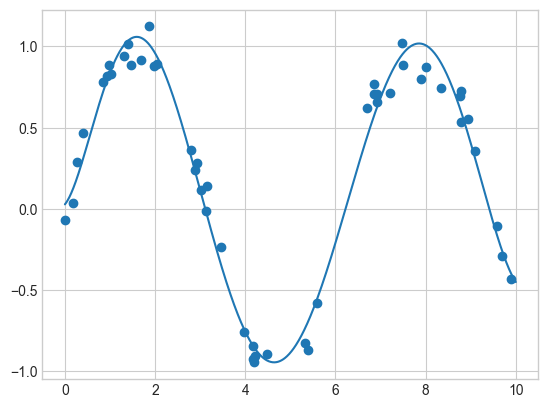

In [71]:
rng = np.random.RandomState(1)
x = 10 * rng.rand(50)
y = np.sin(x) + 0.1 * rng.randn(50)

poly_model.fit(x[:, np.newaxis], y)
yfit = poly_model.predict(xfit[:, np.newaxis])

plt.scatter(x, y)
plt.plot(xfit, yfit)

Our linear model, through the use of seventh-order polynomial basis functions, can provide an excellent fit to this nonlinear data!

### Gaussian Basis Functions

For example, one useful pattern is to fit a model that is not a sum of polynomial bases, but a sum of Gaussian bases.

The shaded regions in the plot are the scaled basis functions, and when added together they reproduce the smooth curve through the data.
These Gaussian basis functions are not built into Scikit-Learn, but we can write a custom transformer that will create them, as shown here and illustrated in the following figure (Scikit-Learn transformers are implemented as Python classes; reading Scikit-Learn's source is a good way to see how they can be created):

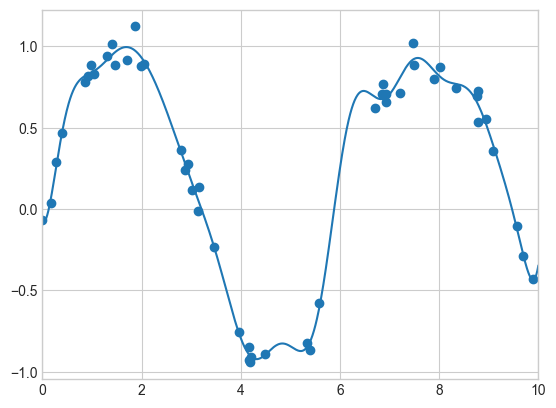

In [72]:
from sklearn.base import BaseEstimator, TransformerMixin

class GaussianFeatures(BaseEstimator, TransformerMixin):
    """Uniformly spaced Gaussian features for one-dimensional input"""
    
    def __init__(self, N, width_factor=2.0):
        self.N = N
        self.width_factor = width_factor
    
    @staticmethod
    def _gauss_basis(x, y, width, axis=None):
        arg = (x - y) / width
        return np.exp(-0.5 * np.sum(arg ** 2, axis))
        
    def fit(self, X, y=None):
        # create N centers spread along the data range
        self.centers_ = np.linspace(X.min(), X.max(), self.N)
        self.width_ = self.width_factor * (self.centers_[1] - self.centers_[0])
        return self
        
    def transform(self, X):
        return self._gauss_basis(X[:, :, np.newaxis], self.centers_,
                                 self.width_, axis=1)
    
gauss_model = make_pipeline(GaussianFeatures(20),
                            LinearRegression())
gauss_model.fit(x[:, np.newaxis], y)
yfit = gauss_model.predict(xfit[:, np.newaxis])

plt.scatter(x, y)
plt.plot(xfit, yfit)
plt.xlim(0, 10);

## Regularization

The introduction of basis functions into our linear regression makes the model much more flexible, but it also can very quickly lead to overfitting.
For example, the following figure shows what happens if we use a large number of Gaussian basis functions:

(-1.5, 1.5)

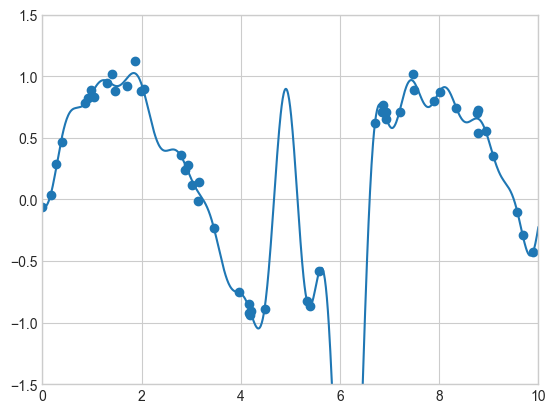

In [73]:
model = make_pipeline(GaussianFeatures(30),
                      LinearRegression())
model.fit(x[:, np.newaxis], y)

plt.scatter(x, y)
plt.plot(xfit, model.predict(xfit[:, np.newaxis]))

plt.xlim(0, 10)
plt.ylim(-1.5, 1.5)

With the data projected to the 30-dimensional basis, the model has far too much flexibility and goes to extreme values between locations where it is constrained by data.
We can see the reason for this if we plot the coefficients of the Gaussian bases with respect to their locations, as shown in the following figure:

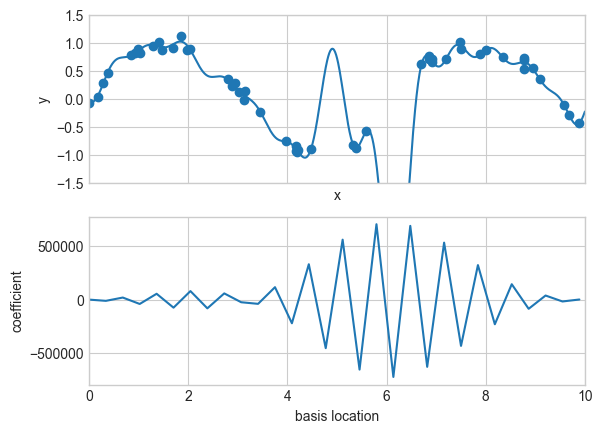

In [74]:
def basis_plot(model, title=None):
    fig, ax = plt.subplots(2, sharex=True)
    model.fit(x[:, np.newaxis], y)
    ax[0].scatter(x, y)
    ax[0].plot(xfit, model.predict(xfit[:, np.newaxis]))
    ax[0].set(xlabel='x', ylabel='y', ylim=(-1.5, 1.5))
    
    if title:
        ax[0].set_title(title)

    ax[1].plot(model.steps[0][1].centers_,
               model.steps[1][1].coef_)
    ax[1].set(xlabel='basis location',
              ylabel='coefficient',
              xlim=(0, 10))
    
model = make_pipeline(GaussianFeatures(30), LinearRegression())
basis_plot(model)

The lower panel of this figure shows the amplitude of the basis function at each location.
This is typical overfitting behavior when basis functions overlap: the coefficients of adjacent basis functions blow up and cancel each other out.
We know that such behavior is problematic, and it would be nice if we could limit such spikes explicitly in the model by penalizing large values of the model parameters.
Such a penalty is known as *regularization*, and comes in several forms.

### Ridge Regression ($L_2$ Regularization)

Perhaps the most common form of regularization is known as *ridge regression* or $L_2$ *regularization* (sometimes also called *Tikhonov regularization*).
This proceeds by penalizing the sum of squares (2-norms) of the model coefficients $\theta_n$. In this case, the penalty on the model fit would be: 
$$
P = \alpha\sum_{n=1}^N \theta_n^2
$$
where $\alpha$ is a free parameter that controls the strength of the penalty.
This type of penalized model is built into Scikit-Learn with the `Ridge` estimator (see the following figure):

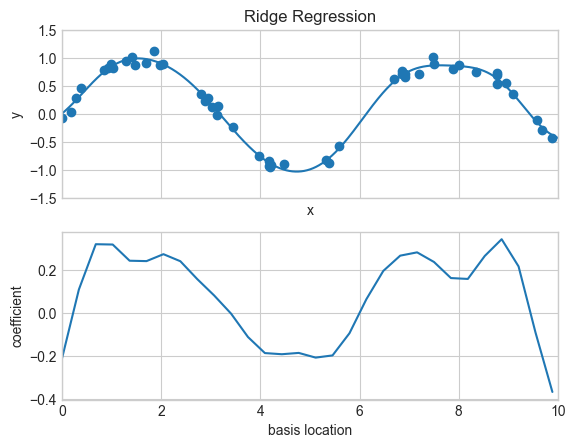

In [75]:
from sklearn.linear_model import Ridge
model = make_pipeline(GaussianFeatures(30), Ridge(alpha=0.1))
basis_plot(model, title='Ridge Regression')

The $\alpha$ parameter is essentially a knob controlling the complexity of the resulting model.
In the limit $\alpha \to 0$, we recover the standard linear regression result; in the limit $\alpha \to \infty$, all model responses will be suppressed.
One advantage of ridge regression in particular is that it can be computed very efficiently—at hardly more computational cost than the original linear regression model.

## Lasso Regression ($L_1$ Regularization)

Another common type of regularization is known as *lasso regression* or *L~1~ regularization* involves penalizing the sum of absolute values (1-norms) of regression coefficients:
$$
P = \alpha\sum_{n=1}^N |\theta_n|
$$
Though this is conceptually very similar to ridge regression, the results can differ surprisingly. For example, due to its construction, lasso regression tends to favor *sparse models* where possible: that is, it preferentially sets many model coefficients to exactly zero.

We can see this behavior if we duplicate the previous example using L1-normalized coefficients (see the following figure):

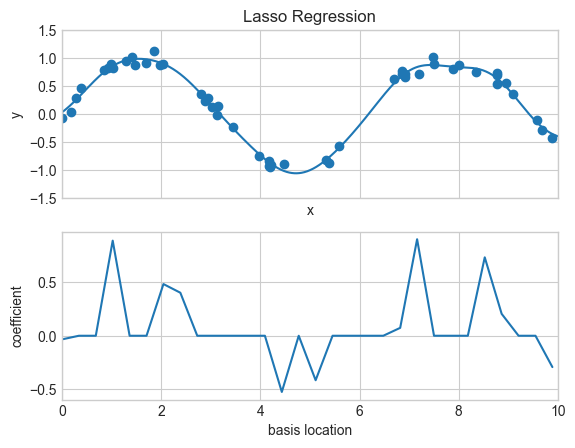

In [76]:
from sklearn.linear_model import Lasso
model = make_pipeline(GaussianFeatures(30), Lasso(alpha=0.001, max_iter=2000))
basis_plot(model, title='Lasso Regression')

# Example: Predicting Bicycle Traffic

We will perform a simple linear regression to relate weather and other information to bicycle counts, in order to estimate how a change in any one of these parameters affects the number of riders on a given day by using the National Oceanic and Atmospheric Administration (NOAA) data whose job is to provide daily [weather station data](http://www.ncdc.noaa.gov/cdo-web/search?datasetid=GHCND) available.

Let's start by loading the two datasets, indexing by date:

In [77]:
url = 'https://raw.githubusercontent.com/jakevdp/bicycle-data/main'
!curl -O {url}/FremontBridge.csv
!curl -O {url}/SeattleWeather.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  5 4585k    5  239k    0     0  2762k      0  0:00:01 --:--:--  0:00:01 2780k
100 4585k  100 4585k    0     0  21.9M      0 --:--:-- --:--:-- --:--:-- 21.9M
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100  534k  100  534k    0     0  4684k      0 --:--:-- --:--:-- --:--:-- 4729k


In [78]:
import pandas as pd
counts = pd.read_csv('FremontBridge.csv',
                     index_col='Date', parse_dates=True)
weather = pd.read_csv('SeattleWeather.csv',
                      index_col='DATE', parse_dates=True)

C:\Users\Anis\AppData\Local\Temp\ipykernel_1532\1332181093.py:2: UserWarning:

Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.



In [79]:
counts.head()

,Fremont Bridge Total,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk
Date,,,
2019-11-01 00:00:00,12.0,7.0,5.0
2019-11-01 01:00:00,7.0,0.0,7.0
2019-11-01 02:00:00,1.0,0.0,1.0
2019-11-01 03:00:00,6.0,6.0,0.0
2019-11-01 04:00:00,6.0,5.0,1.0


In [80]:
weather.head()

,STATION,NAME,AWND,FMTM,PGTM,PRCP,SNOW,SNWD,TAVG,TMAX,...,WT04,WT05,WT08,WT09,WT13,WT14,WT16,WT17,WT18,WT22
DATE,,,,,,,,,,,,,,,,,,,,,
2012-01-01,USW00024233,"SEATTLE TACOMA AIRPORT, WA US",10.51,NaN,NaN,0.00,0.0,0.0,NaN,55,...,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN
2012-01-02,USW00024233,"SEATTLE TACOMA AIRPORT, WA US",10.07,NaN,NaN,0.43,0.0,0.0,NaN,51,...,NaN,NaN,NaN,NaN,1.0,NaN,1.0,NaN,NaN,NaN
2012-01-03,USW00024233,"SEATTLE TACOMA AIRPORT, WA US",5.14,NaN,NaN,0.03,0.0,0.0,NaN,53,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN
2012-01-04,USW00024233,"SEATTLE TACOMA AIRPORT, WA US",10.51,NaN,NaN,0.80,0.0,0.0,NaN,54,...,NaN,NaN,NaN,NaN,1.0,NaN,1.0,NaN,NaN,NaN
2012-01-05,USW00024233,"SEATTLE TACOMA AIRPORT, WA US",13.65,NaN,NaN,0.05,0.0,0.0,NaN,48,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN


For simplicity, let's look at data prior to 2020 in order to avoid the effects of the COVID-19 pandemic, which significantly affected commuting patterns in Seattle:

In [81]:
counts = counts[counts.index < "2020-01-01"]
weather = weather[weather.index < "2020-01-01"]

Next we will compute the total daily bicycle traffic, and put this in its own `DataFrame`:

In [82]:
daily = counts.resample('d').sum()
daily['Total'] = daily.sum(axis=1)
daily = daily[['Total']] # remove other columns

We saw previously that the patterns of use generally vary from day to day. Let's account for this in our data by adding binary columns that indicate the day of the week:

In [83]:
days = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
for i in range(7):
    daily[days[i]] = (daily.index.dayofweek == i).astype(float)

Similarly, we might expect riders to behave differently on holidays; let's add an indicator of this as well:

In [84]:
from pandas.tseries.holiday import USFederalHolidayCalendar
cal = USFederalHolidayCalendar()
holidays = cal.holidays('2012', '2020')
daily = daily.join(pd.Series(1, index=holidays, name='holiday'))
daily['holiday'].fillna(0, inplace=True)

We also might suspect that the hours of daylight would affect how many people ride. Let's use the standard astronomical calculation to add this information (see the following figure):

(8.0, 17.0)

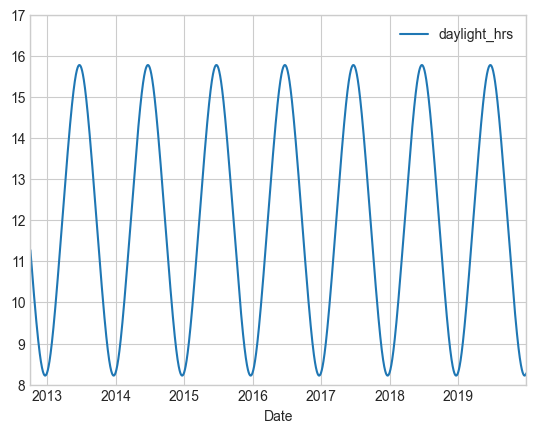

In [85]:
def hours_of_daylight(date, axis=23.44, latitude=47.61):
    """Compute the hours of daylight for the given date"""
    days = (date - pd.Timestamp(2000, 12, 21)).days
    m = (1. - np.tan(np.radians(latitude))
         * np.tan(np.radians(axis) * np.cos(days * 2 * np.pi / 365.25)))
    return 24. * np.degrees(np.arccos(1 - np.clip(m, 0, 2))) / 180.

daily['daylight_hrs'] = list(map(hours_of_daylight, daily.index))
daily[['daylight_hrs']].plot()
plt.ylim(8, 17)

We can also add the average temperature and total precipitation to the data.
In addition to the inches of precipitation, let's add a flag that indicates whether a day is dry (has zero precipitation):

In [86]:
weather['Temp (F)'] = 0.5 * (weather['TMIN'] + weather['TMAX'])
weather['Rainfall (in)'] = weather['PRCP']
weather['dry day'] = (weather['PRCP'] == 0).astype(int)

daily = daily.join(weather[['Rainfall (in)', 'Temp (F)', 'dry day']])

Finally, let's add a counter that increases from day 1, and measures how many years have passed.
This will let us measure any observed annual increase or decrease in daily crossings:

In [87]:
daily['annual'] = (daily.index - daily.index[0]).days / 365.

Now our data is in order, and we can take a look at it:

In [88]:
daily.head()

,Total,Mon,Tue,Wed,Thu,Fri,Sat,Sun,holiday,daylight_hrs,Rainfall (in),Temp (F),dry day,annual
Date,,,,,,,,,,,,,,
2012-10-03,14084.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,11.277359,0.0,56.0,1,0.000000
2012-10-04,13900.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,11.219142,0.0,56.5,1,0.002740
2012-10-05,12592.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,11.161038,0.0,59.5,1,0.005479
2012-10-06,8024.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,11.103056,0.0,60.5,1,0.008219
2012-10-07,8568.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,11.045208,0.0,60.5,1,0.010959


With this in place, we can choose the columns to use, and fit a linear regression model to our data.
We will set `fit_intercept=False`, because the daily flags essentially operate as their own day-specific intercepts:

In [89]:
# Drop any rows with null values
daily.dropna(axis=0, how='any', inplace=True)

column_names = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun',
                'holiday', 'daylight_hrs', 'Rainfall (in)',
                'dry day', 'Temp (F)', 'annual']
X = daily[column_names]
y = daily['Total']

model = LinearRegression(fit_intercept=False)
model.fit(X, y)
daily['predicted'] = model.predict(X)

Finally, we can compare the total and predicted bicycle traffic visually (see the following figure):

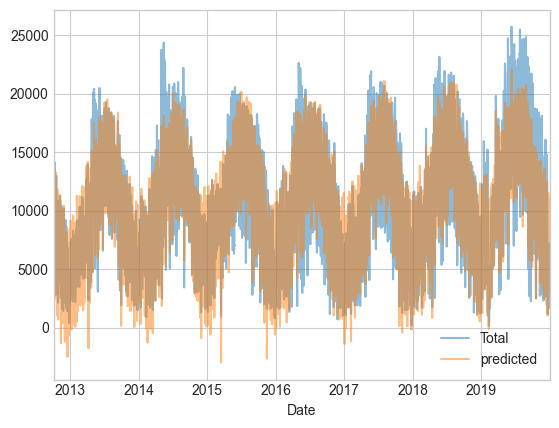

In [90]:
daily[['Total', 'predicted']].plot(alpha=0.5);

From the fact that the data and model predictions don't line up exactly, it is evident that we have missed some key features.
Either our features are not complete (i.e., people decide whether to ride to work based on more than just these features), or there are some nonlinear relationships that we have failed to take into account (e.g., perhaps people ride less at both high and low temperatures).
Nevertheless, our rough approximation is enough to give us some insights, and we can take a look at the coefficients of the linear model to estimate how much each feature contributes to the daily bicycle count:

In [91]:
params = pd.Series(model.coef_, index=X.columns)
params

Mon              -3309.953439
Tue              -2860.625060
Wed              -2962.889892
Thu              -3480.656444
Fri              -4836.064503
Sat             -10436.802843
Sun             -10795.195718
holiday          -5006.995232
daylight_hrs       409.146368
Rainfall (in)    -2789.860745
dry day           2111.069565
Temp (F)           179.026296
annual             324.437749
dtype: float64

### Limitation


Our simple model is almost certainly missing some relevant information. 

For example, nonlinear effects (such as effects of precipitation *and* cold temperature) and nonlinear trends within each variable (such as disinclination to ride at very cold and very hot temperatures) cannot be accounted for in a simple linear model.


Additionally, we have thrown away some of the finer-grained information (such as the difference between a rainy morning and a rainy afternoon), and we have ignored correlations between days (such as the possible effect of a rainy Tuesday on Wednesday's numbers, or the effect of an unexpected sunny day after a streak of rainy days).

# The End

Reference:
- [Linear Regression Tutorial](https://www.kaggle.com/code/sudhirnl7/linear-regression-tutorial)